**Clustering**

[le code source](https://datascience.oneoffcoder.com/kmc-bic-aic.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn_extra.cluster import KMedoids
from scipy.spatial import distance

In [2]:
Data1=pd.read_csv('DATA1.txt',sep='\s+', header=None,
                  names=['Dim1','Dim2'],
                  dtype={'Dim1': np.float64, 'Dim2': np.float64})

In [16]:
from sklearn import datasets
(data,target) = datasets.load_iris(return_X_y=True)
nomDesVariables = ['hauteur sépale','largeur sépale','hauteur pétale','largeur pétale']
df_iris = pd.DataFrame(data,columns=nomDesVariables)

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

In [4]:
def get_km(k, X):
    km = KMeans(n_clusters=k, random_state=37)
    km.fit(X)
    return km

def get_bic_aic(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X), gmm.aic(X)

def get_score(k, X):
    km = get_km(k, X)
    y_pred = km.predict(X)
    bic, aic = get_bic_aic(k, X)
    sil = silhouette_score(X, y_pred)
    db = davies_bouldin_score(X, y_pred)
    #hom = homogeneity_score(y, y_pred)
    #com = completeness_score(y, y_pred)
    #vms = v_measure_score(y, y_pred)
    cal = calinski_harabasz_score(X, y_pred)
    return k, bic, aic, sil, db, cal

In [17]:
#X = Data1.values
X = data

In [18]:
import pandas as pd

df = pd.DataFrame([get_score(k, X) for k in range(2, 11)],
                  columns=['k', 'BIC', 'AIC', 'silhouette',
                           'davies', 'calinski'])
df

,k,BIC,AIC,silhouette,davies,calinski
0,2,574.017833,486.709409,0.681046,0.404293,513.924546
1,3,580.859425,448.391472,0.552819,0.661972,561.627757
2,4,625.441241,447.813759,0.498051,0.780307,530.765808
3,5,687.501189,464.714177,0.488749,0.805965,495.541488
4,6,729.323679,461.377138,0.367846,0.925770,473.515454
5,7,754.120292,441.014222,0.356688,0.971486,449.620571
6,8,782.529780,424.264180,0.357454,0.922791,437.603211
7,9,825.118986,421.693857,0.349177,0.989300,406.746944
8,10,862.428233,413.843574,0.317359,1.071193,380.210892


#### Visualisation

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
plt.style.use('ggplot')

def plot_compare(df, y1, y2, x, fig, ax1):
    ax1.plot(df[x], df[y1], color='tab:red')
    ax1.set_title(f'{y1} and {y2}')
    ax1.set_xlabel(x)
    ax1.set_ylabel(y1, color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(df[x], df[y2], color='tab:blue')
    ax2.set_ylabel(y2, color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

def plot_contrast(df, y1, y2, x, fig, ax):
    a = np.array(df[y1])
    b = np.array(df[y2])

    r_min, r_max = df[y1].min(), df[y1].max()
    scaler = MinMaxScaler(feature_range=(r_min, r_max))
    b = scaler.fit_transform(b.reshape(-1, 1))[:,0]

    diff = np.abs(a - b)
    ax.plot(df[x], diff)
    ax.set_title('Scaled Absolute Difference')
    ax.set_xlabel(x)
    ax.set_ylabel('absolute difference')

def plot_result(df, y1, y2, x):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    plot_compare(df, y1, y2, x, fig, axes[0])
    plot_contrast(df, y1, y2, x, fig, axes[1])
    plt.tight_layout()

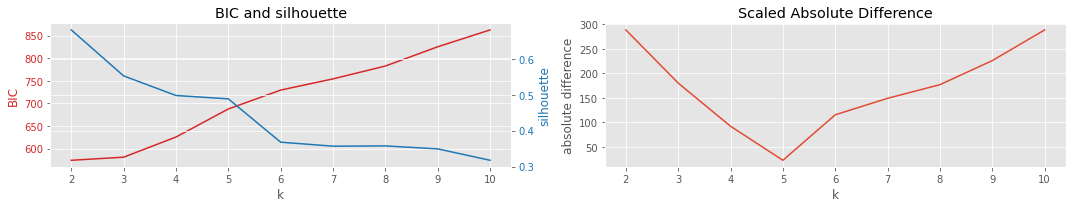

In [19]:
plot_result(df, 'BIC', 'silhouette', 'k')

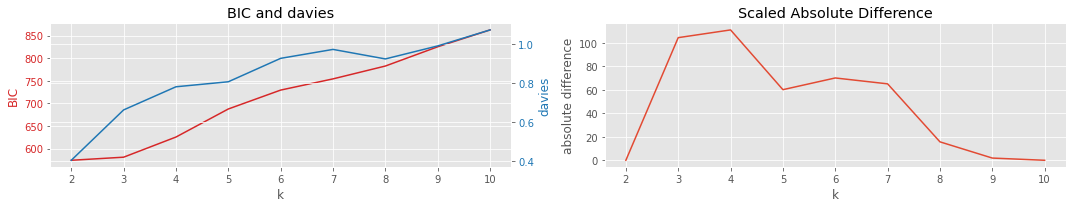

In [20]:
plot_result(df, 'BIC', 'davies', 'k')

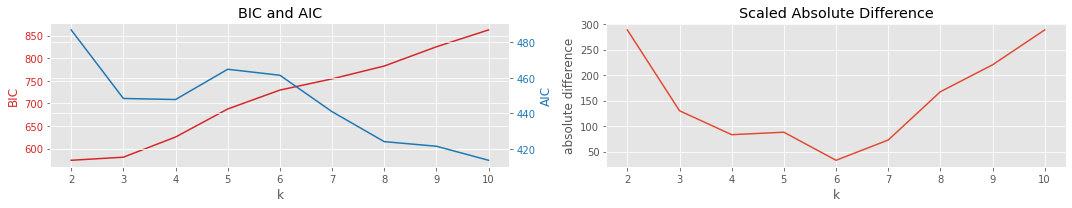

In [21]:
plot_result(df, 'BIC', 'AIC', 'k')